In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def matrix_factorization_model(A,k,seed=10,alpha=0.01,beta=0.02,iterr=20):
    
    """
    Matrix factorization model.
    
    Input:
    A - matrix that we need to factorize (matrix with empty (=0) cells)
    k - factorization parametr (the number of latent features)
    iterr - the number of iterations
    seed - seed parametr for initialize matrices P and Q
    alpha - learning rate for matrices P and Q
    beta - learning rate for biases
    
    Output:
    scores - MSE in time train process
    res - dict as {'P':P, 'Q':Q, 'b':b, 'bi':bi, 'bj':bj}, where:
            P and Q - matrices, their dot product male factorization of matrix A
            b,bi,bj - biases
    """
    

    
    n,m=A.shape
    np.random.seed(10)
    P=np.random.randn(n,k)
    Q=np.random.randn(m,k)
    b=np.mean(A[np.where(A!=0)])
    bi=np.zeros(n)
    bj=np.zeros(m)
    
    
    train=[(i,j,A[i,j]) for i in range(n) for j in range(m) if A[i,j]!=0]
    df=pd.DataFrame(train,columns=['user','item','rating'])
    
    def  backprop(x, P=P, Q=Q, b=b, bi=bi, bj=bj,alpha=alpha, beta=beta):
        i=x[0]
        j=x[1]
        a=x[2]
        a_hat=b + np.dot( P[i,:]+bi[i] ,(Q[j,:]+bj[j]).T)
        e=(a_hat-a)

        dp=e*(Q[j,:]+bj[j])
        P[i,:]=P[i,:]-alpha*dp

        dq=e*(P[i,:]+bi[i])
        Q[j,:]=Q[j,:]-alpha*dq

        db=e
        b=b-beta*e

        dbi=dp
        bi[i]=bi[i]-beta*np.mean(dbi)

        dbj=dq
        bj[j]=bj[j]-beta*np.mean(dbj)

        a_hat=b + np.dot( P[i,:]+bi[i] ,(Q[j,:]+bj[j]).T)
        err=(a-a_hat)**2

        return P,Q,b,bi,bj,err
    
    scores=[]
    for _ in range(iterr):
        batch_scores=[]
        for x in df.index:
            P,Q,b,bi,bj,err=backprop(df[['user','item','rating']].loc[x,:])
            batch_scores.append(err)
        scores.append(np.mean(batch_scores))
    
    plt.plot(scores)
    result={'P':P, 'Q':Q, 'b':b, 'bi':bi, 'bj':bj}
    return scores, result
    

In [3]:
def factorization(result):
    n=result['P'].shape[0]
    m=result['Q'].shape[0]
    return result['b'] + np.dot(result['P']+result['bi'].reshape(n,1), (result['Q']+result['bj'].reshape(m,1)).T)

In [4]:
A=np.array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])

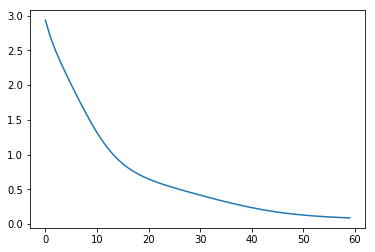

In [12]:
scores, result=matrix_factorization_model(A,k=2,iterr=60)

In [13]:
A_hat=factorization(result)
np.round(A_hat,2)

array([[4.75, 3.05, 0.91, 0.86],
       [4.34, 4.62, 1.44, 1.41],
       [0.69, 0.92, 4.54, 4.57],
       [1.22, 1.83, 4.12, 4.15],
       [0.81, 1.07, 4.44, 4.47]])

In [7]:
A

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])

In [17]:
print (f'MSE on {len(scores)} iteration  {scores[-1]}')

MSE on 60 iteration  0.0856317136302503
